# 3. Machine Learning for Classification

We want to identify that clients that are willing to churn (stop using this services).
How could we do this? We give every customer a score between 0 and 1 that tells how likely this customer is going to leave. Then we can send promotional e-mails to this customers – giving some discount to keep this customer.

The way we approach this with Machine Learning is Binary Classification

The formula for one single observation: g(xi) ~ yi

Output of our model is yi that is a value between {0, 1} which is the likelihood that this particular customer number i is going to churn.
1 means positive example, customer left the company, 0 means negative example, customer didn’t left the company. So in general 1 means that there is something present (the effect/reason for churning we want to predict is present) and 0 means that it’s not present.

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

Source: https://knowmledge.com/2023/09/26/ml-zoomcamp-2023-machine-learning-for-classification-part-2/

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

### Download the data

In [3]:
# %pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [6]:
#!wget $data -O data-week-3.csv 

### Reading data

In [7]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To display all of them simultaneously, we can use the transpose function. This will switch the rows to become columns and the columns to become rows.

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#### Making column names and values look uniform

What we can observe here is that the data is not consistent or uniform. So, we’ll follow a similar approach as we did before in the car price prediction project

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


#### Verify that all the columns have been read correctly

Now, all the column names are uniform, and all spaces have been replaced with underscores. Next, let’s examine the data types we have.

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We notice a few interesting things here. ‘Seniorcitizen’ is represented as a numerical value (0 or 1) rather than a string (‘yes’ or ‘no’), and ‘totalcharges’ is currently classified as an object (string) but should be a numerical data type

In [12]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

Indeed, ‘totalcharges’ appears to be numeric in nature. It seems that some of the values are not in numeric format. Let’s attempt to convert them into numbers

In [13]:
# pd.to_numeric(df.totalcharges) # Output: ValueError: Unable to parse string “_” at position

# This means that the column doesn’t only contain numbers but also includes characters like ‘_’, which are not numeric.
# If Pandas encounters a string that it cannot parse as a number, we can instruct it to ignore the string and replace it 
# with ‘NaN’ (Not a number). This can be achieved by using a parameter called ‘errors,’ and setting it to ‘coerce,’ 
# which means Pandas will disregard such errors.

tc = pd.to_numeric(df.totalcharges, errors='coerce') # tc means total charges
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [14]:
tc.isnull().sum()

np.int64(11)

In [15]:
# df[tc.isnull()] # it's not easy to see so we need a different one
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Now let’s take of that values. We can fill those values with 0. However, it’s important to keep in mind that 0 is not always the ideal choice, but in many practical scenarios, it’s an acceptable one.

In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

np.int64(0)

#### Checking if the churn variable needs any preparation

The last thing we wanted to do is look at the churn variable. We see that the values are either “yes” or “no.” In machine learning, for classification, we are interested in numerical values. In this case, we can represent “churn” as 1 and “not churn” as 0.

In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

To obtain these numerical values, we can replace “yes” with 1 and “no” with 0,

In [18]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Now, let’s apply this transformation to all values in this column and update it in the df.churn column.

In [19]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework

Source: https://knowmledge.com/2023/09/27/ml-zoomcamp-2023-machine-learning-for-classification-part-3/

Perform the train/validation/test split with Scikit-Learn. You can utilize the `train_test_split` function from the `sklearn.model_selection` package to automate the splitting of your data into training, validation, and test sets

In [20]:
from sklearn.model_selection import train_test_split
# train_test_split? # To see the documentation

The train_test_split function divides the dataframe into two parts, with 80% for the full train set and 20% for the test set. We use random_state=1 to ensure that the results are reproducible

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) # train_test_split function creates shuffled datasets.
len(df_full_train), len(df_test)

(5634, 1409)

To obtain three sets (train, validation, and test), we should perform the split again with the full train set. However, this time, we want to allocate 60% for the train set and 20% for the validation set. To calculate the validation set size, we can’t use test_size=0.2 as before because we are dealing with 80% of the data. Instead, we need to determine 20% of 80%, which is equivalent to 25%. Therefore, for the validation set, we should use test_size=0.25 (because 25% of 80 is 20% of the original 100 https://chatgpt.com/share/67f3a94b-deac-8012-a7df-6c7d8e1334db).

In [22]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

We see that validation set and test set have the same size now.

In [23]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

When you use train_test_split to split your dataset into training and testing subsets, it randomly selects rows from the original DataFrame. This means that the original index values are also shuffled along with the data. To reset the indices, you can use the reset_index function with the drop=True parameter to drop the old index column

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Now, we need to extract our target variable, which is ‘y' (churn).

In [25]:
y_full_train = df_full_train.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

To prevent accidental use of the “churn” variable when building a model, we should remove it from our dataframes

In [26]:
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

## 3.4 EDA

Source: https://knowmledge.com/2023/09/27/ml-zoomcamp-2023-machine-learning-for-classification-part-4/

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

### Checking missing values

In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [28]:
# Above, dataset ‘df_full_train’ contains no missing values

### Looking at the target variable (churn)

In [29]:
df_full_train.churn

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

Now, we can check of our target variable ‘churn’. How many customers are churning and how many are not-churning.

In [30]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

There is information about a total of 5634 customers. Among these, 1521 are dissatisfied customers (churning), while the remaining 4113 are satisfied customers (not churning).

Using the value_counts function with the normalize=True (represent in percentage) parameter provides the churn rate, which represents the proportion of churning customers relative to the total number of customers. In our case, we’ve calculated that the churn rate is almost 27%.

In [31]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [32]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

### Looking at numerical and categorical variables

To identify the categorical (strings) and numerical variables in your dataset, you can use the dtypes function as mentioned earlier.

In [33]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
categorical_vars = df.select_dtypes(include=['object'])
 
print("Numerical Variables:")
print(numerical_vars.columns)
 
print("\nCategorical Variables:")
print(categorical_vars.columns)

Numerical Variables:
Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

Categorical Variables:
Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


Let’s look at our dataframe.

In [34]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Let’s define numerical and categorical columns.

In [35]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [36]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
# Removed/excluding 'customerid', 'tenure', 'monthlycharges', 'totalcharges', and 'churn' column (choosing which columns to treat as categorical features by manually excluding certain ones)
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

To determine the number of unique values for all the categorical variables, we can use the nunique() function.

In [38]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
(source: https://knowmledge.com/2023/09/28/ml-zoomcamp-2023-machine-learning-for-classification-part-5/)


Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

### Churn rate

Last time, we examined the global churn rate. Now, we are focusing on the churn rate within different groups. For example, we are interested in determining the churn rate for the gender group.

In [39]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [40]:
# Selecting the subset of female customers
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
611,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
2890,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
5150,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
997,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5396,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5056,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
2895,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


The following snippet displays the value of the global churn rate. In comparison to that value, we can also calculate the churn rates for the female and male groups. We observe that the female churn rate is slightly higher than the global rate, while the male churn rate is slightly lower than the global rate. This suggests that women are somewhat more likely to churn.

In [41]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [42]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [43]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [44]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [45]:
global_churn - churn_male

np.float64(0.006754520462819769)

Let’s check the churn rate of another group (with partner vs. without partner).

In [46]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

When examining this group, we notice that customers with partners are significantly less likely to churn. The churn rate for this group is approximately 20.5%, contrasting with the global churn rate of almost 27%. On the other hand, customers without partners have a much higher churn rate compared to the global rate, standing at 33% as opposed to 27%.

In [47]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [48]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [49]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [50]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [51]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

This observation suggests that the partner variable may be more influential for predicting churn than the gender variable.

### Risk ratio

The risk ratio (relative risk) measures how likely an event (e.g., churn) is in one group compared to another. It’s calculated as the probability of churn in one group divided by the probability in another.

- Interpretation: A risk ratio >1 means higher churn risk in the first group, <1 means lower risk, and =1 means no difference.
- Application: Helps assess the impact of features like promotions on churn. If a promo group has a lower churn risk, the promo is effective.
- Statistical Significance: Tests like chi-square or confidence intervals confirm if the difference is meaningful.
This helps businesses understand churn factors and improve retention strategies.

For example, if customers who received a promo churn less than those who didn’t, the promo reduces churn. Statistical tests help confirm if the difference is meaningful. This metric helps identify factors affecting churn and improve retention strategies.

Let’s compare the risk ratio for churning between people with partners and those without partners.

In [52]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [53]:
churn_partner / global_churn

np.float64(0.7594724924338315)

This demonstrates that the churn rate for people without partners is 22% higher, whereas for people with partners, it is 24% lower than the global churn rate.

Let’s take the data and group it by gender, and for each variable within the gender group, let’s calculate the average churn rate within that group and calculate the difference and risk. We can perform this analysis for all the variables, not just the gender variable.

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [54]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [55]:
# agg takes a list of different aggregations
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [56]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


This table is interesting, but it only displays information for the gender groups. Now, let’s extend this analysis to include all the categorical columns

In [57]:
from IPython.display import display

In [58]:
for c in categorical:
    # print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#### Summary:
Above explains two key tools for assessing feature importance in churn prediction: difference and risk ratio.

- Difference is found by subtracting a group's churn rate from the global churn rate. A negative value means a higher chance of churn, while a positive value means a lower chance.
- Risk ratio is calculated by dividing a group’s churn rate by the global churn rate. A value above 1 suggests higher churn likelihood, and below 1 suggests lower churn likelihood.

Both metrics provide similar insights in different ways. They help identify which categories show higher or lower churn rates compared to the average, making them useful for machine learning models. The next step is to measure the overall importance of each variable, like comparing "contract" and "streamingmovies."

## 3.6 Feature importance: Mutual information

(source: https://knowmledge.com/2023/09/28/ml-zoomcamp-2023-machine-learning-for-classification-part-6/)

Indeed the risk ratio helps identify important categorical variables by showing how likely customers are to churn based on different values. For example, customers with month-to-month contracts tend to churn more than those with two-year contracts, indicating that contract type is an important factor in churn prediction. However, without a way to compare its importance to other variables, its relative significance remains unclear.

Mutual information solves this by measuring how much knowing one variable helps predict another. Higher mutual information means a variable provides more insight into churn. This allows for comparing the importance of different categorical variables in predicting churn.

So, the Mutual information is a concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

In [59]:
from sklearn.metrics import mutual_info_score

In [60]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [61]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [62]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

np.float64(0.0001174846211139946)

In [63]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

np.float64(0.009967689095399745)

Once more: The **intuition here is how much we learn about churn by observing the value of the contract variable or any other variable and vice versa**. We observe, for example, that the gender variable is not particularly informative.

At all we can learn about the relative importance of the features. What we can do now, we can apply this metric to all the categorical variables and see which one has the highest mutual information.

The apply function takes a function with one argument, but mutual_info_score requires two arguments. That’s why we need to implement the mutual_info_churn_score function, which can be applied to the dataframe to compute mutual information scores column-wise

In [64]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [65]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [66]:
### To arrange this list in such a way that the most important variables come first, we can sort the variables 
# based on their mutual information scores in descending order. This way, the most important variables 
# will appear at the top of the list.
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Using this approach, we can gain a better understanding of which variables are highly informative for churn for our analysis and which are less so.

## 3.7 Feature importance: Correlation

(source: https://knowmledge.com/2023/09/29/ml-zoomcamp-2023-machine-learning-for-classification-part-7/)

To measure feature importance for numerical variables in churn prediction, use **Pearson’s correlation coefficient (r)**. It shows how strongly each variable is linearly related to churn:


- **r ranges from -1 to 1**:
  - **+1**: strong positive correlation (both increase)
  - **-1**: strong negative correlation (one increases, the other decreases)
  - **0**: no linear relationship


- **Strength guide**:
  - `0.0 < |r| < 0.2`: Low
  - `0.2 < |r| < 0.5`: Moderate
  - `0.6 < |r| < 1.0`: Strong


- In Python (with pandas):
  ```python
  correlation = df[numerical_vars].corr()['churn']
  ```


- **Interpretation**:
  - **Positive r**: Higher values → higher churn
  - **Negative r**: Higher values → lower churn
  - **Higher |r|** = more important feature

By calculating Pearson’s correlation, you can identify which numerical features have the most impact on churn prediction. Higher absolute values of r indicate stronger importance. Use this to rank numerical features by how much they relate to churn.

df_full_train[numerical]

In [67]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

To rank numerical features by importance without considering the direction of correlation, use the absolute values of the correlation coefficients (|r|). By sorting the absolute values of the correlation coefficients in descending order, you can identify which numerical variables have the greatest magnitude of correlation with churn and therefore contribute most significantly to predicting churn. 

In [68]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

It seems that tenure is the most important numerical variable. Let’s look at some examples:

In [69]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [70]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [71]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [72]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

Regarding the variable “tenure,” we can observe that the group of customers with the highest likelihood to churn consists of those with a tenure of less than or equal to 2. It has a churn rate of almost 60%.

Let’s look at another example:

In [73]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [74]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [75]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

Concerning the variable “monthlycharges,” we can observe that the group of customers with the highest likelihood to churn belongs to the group with monthly charges greater than $50. It has a churn rate of 32.5%.

## 3.8 One-hot encoding

(Source: https://knowmledge.com/2023/09/29/ml-zoomcamp-2023-machine-learning-for-classification-part-8/)

One-hot encoding **converts categorical data into a numeric format for machine learning models that require numerical input.**

Problem:
Categorical data (e.g., “color” with values like “red,” “green,” “blue”) cannot be directly used in machine learning because models require numerical input.

How One-Hot Encoding Works:
- It creates a separate binary (0 or 1) feature for each category in a categorical variable.
- Example:
    - For the "color" feature, it creates three binary features: "IsRed," "IsGreen," "IsBlue."
    - If the color is "red," then "IsRed" = 1, while "IsGreen" = 0 and "IsBlue" = 0.

Scikit-Learn provides tools for performing one-hot encoding, making it easy to transform categorical data into a numerical format for machine learning models.

#### Use Scikit-Learn to encode categorical features

Using the Pandas to_dict function with the orient parameter set to ‘records’ transforms the dataframe into a collection of dictionaries. In this format, each row or record is converted into a separate dictionary.

In [76]:
# turns each column into a dictionary --> but the result is not what we want here
# df_train[['gender', 'contract']].iloc[:100].to_dict()
 
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

First, we need to create a new instance of this class. Then, we train our DictVectorizer instance (You give it a list of dictionaries, and it turns them into a format (a matrix) that models like linear regression or decision trees can work with). This involves presenting the data to the DictVectorizer so that it can infer the column names and their corresponding values. Based on this information, it creates the one-hot encoding feature matrix.

It’s worth noting that the DictVectorizer is intelligent enough to detect numerical variables and exclude them from one-hot encoding, as they don’t require such encoding.

In [77]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

dv.fit(dicts)

DictVectorizer()

In [78]:
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

When using the transform method as shown in the last snippet, it creates a sparse matrix by default. A sparse matrix is a memory-efficient way of encoding data when there are many zeros in the dataset. But we’ll not use sparse matrix here.

In the code of the next snippet, the DictVectorizer returns a regular NumPy array where the first three columns represent the “contract” variable, and the last two columns represent the “gender” variable

In [81]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [82]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Let’s bring it all together

In [83]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [161]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [84]:
# Short version without long outputs:
from sklearn.feature_extraction import DictVectorizer
 
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
 
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
# instead of last two lines, you can also use
# X_train = dv.fit_transform(train_dicts)

X_train.shape
# Output: (4225, 45)

(4225, 45)

When dealing with validation data, we can reuse the same DictVectorizer instance that we created before. Instead of using the fit function followed by the transform function, we only need to apply the transform function to the validation data. This ensures that the transformation process applied to the validation data is consistent with the encoding used for the training data.

In [86]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

## 3.9 Logistic regression

(source: https://knowmledge.com/2023/09/30/ml-zoomcamp-2023-machine-learning-for-classification-part-9/)

(See last prompt: https://chatgpt.com/share/67a17672-d3ec-8012-b524-d6c7632e3d24)

* Binary classification
* Linear vs logistic regression

### **Logistic Regression (Binary Classification)**  
Logistic regression is used for binary classification, where the target variable (y) has two possible values: **0 or 1** (e.g., "no churn" vs. "churn" or "spam" vs. "no spam").  

### **How It Works:**  
- Instead of predicting a raw number like linear regression, logistic regression outputs a probability (between 0 and 1) that a data point belongs to the **positive class (1).**  
- This is done using the **sigmoid function**, which converts any real number into a value between 0 and 1.  

### **Formulas:**  
- **Linear Regression:**  
  \[
  g(x) = w_0 + w^T x
  \]
  (Outputs values from **-∞ to ∞** → not suitable for probabilities)  

- **Logistic Regression:**  
  \[
  g(x) = \text{SIGMOID}(w_0 + w^T x)
  \]
  (Outputs values from **0 to 1**, making it a probability)  

- **Sigmoid Function:**  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]
  This ensures the output is always between 0 and 1.  

Let’s see how to implement the sigmoid function and use it. We can create an array with 51 values between -7 and 7 using np.linspace(-7, 7, 51). This is our z in the next snippet

In [87]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [88]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [90]:
# sigmoid(10000)

In [91]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

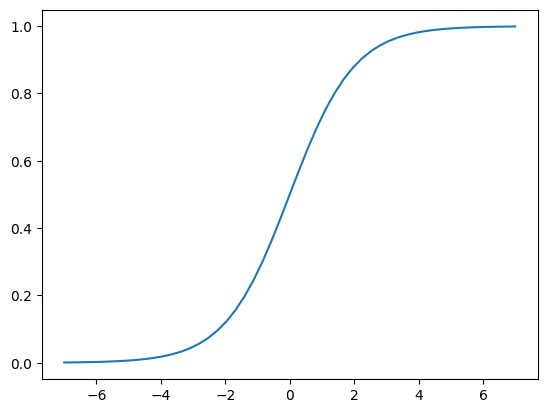

In [92]:
plt.plot(z, sigmoid(z))

At the end, both implementations are presented for comparison. The first snippet demonstrates the familiar linear regression, while the second snippet illustrates logistic regression. It’s evident that there is essentially only one difference between the two: in logistic regression, the sigmoid function is applied to the result of the linear regression to transform it into a probability value between 0 and 1.

In [93]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [170]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

Linear regression and logistic regression are called linear models, because dot product in linear algebra is a linear operator. Linear models are fast to use, fast to train.

## 3.10 Training logistic regression with Scikit-Learn

(source: https://knowmledge.com/2023/09/30/ml-zoomcamp-2023-machine-learning-for-classification-part-10/)

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

### Train a model with Scikit-Learn

In [94]:
from sklearn.linear_model import LogisticRegression

When you want to train a logistic regression model, the process is quite similar to training a linear regression model.

In [96]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/kamrul/miniconda3/envs/mlzoomcamp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# You can use the ‘coef_’ attribute to display the weights (coefficients) in a logistic regression model.
model.coef_

array([[ 5.64103371e-01, -1.53734240e-01, -5.19155705e-01,
        -1.32977867e-02, -9.54887881e-02,  7.12426185e-02,
        -9.82489918e-02, -8.17802015e-02, -3.25289351e-02,
        -7.62576397e-02, -3.53663464e-01,  3.43125881e-01,
        -9.82489918e-02,  2.07687059e-03, -2.50595389e-01,
         1.62031166e-01, -2.02223516e-02,  6.55022995e-02,
        -9.82489918e-02, -7.60398825e-02,  2.50662431e-01,
        -9.82489918e-02, -2.61200014e-01, -2.27866111e-01,
         1.19079536e-01, -1.21248632e-01,  1.24620575e-02,
        -9.49748454e-02, -3.02471209e-02,  4.49016038e-02,
        -2.84662123e-02,  1.62031166e-01, -2.70817741e-01,
         2.20640249e-01, -9.73790420e-02, -9.82489918e-02,
         8.68414590e-02, -4.99556591e-02, -9.82489918e-02,
         3.94180762e-02,  1.94389753e-01, -9.82489918e-02,
        -2.04927336e-01, -7.21547204e-02,  4.34177467e-04]])

The ‘coef_’ attribute in logistic regression returns a 2-dimensional array, but if you’re interested in the weight vector ‘w,’ you can access it by indexing the first row. In most cases, you’ll find the weight vector ‘w’ you’re interested in by accessing ‘coef_[0].’

In [98]:
model.coef_[0]

array([ 5.64103371e-01, -1.53734240e-01, -5.19155705e-01, -1.32977867e-02,
       -9.54887881e-02,  7.12426185e-02, -9.82489918e-02, -8.17802015e-02,
       -3.25289351e-02, -7.62576397e-02, -3.53663464e-01,  3.43125881e-01,
       -9.82489918e-02,  2.07687059e-03, -2.50595389e-01,  1.62031166e-01,
       -2.02223516e-02,  6.55022995e-02, -9.82489918e-02, -7.60398825e-02,
        2.50662431e-01, -9.82489918e-02, -2.61200014e-01, -2.27866111e-01,
        1.19079536e-01, -1.21248632e-01,  1.24620575e-02, -9.49748454e-02,
       -3.02471209e-02,  4.49016038e-02, -2.84662123e-02,  1.62031166e-01,
       -2.70817741e-01,  2.20640249e-01, -9.73790420e-02, -9.82489918e-02,
        8.68414590e-02, -4.99556591e-02, -9.82489918e-02,  3.94180762e-02,
        1.94389753e-01, -9.82489918e-02, -2.04927336e-01, -7.21547204e-02,
        4.34177467e-04])

In [99]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [100]:
# You can use the ‘intercept_’ attribute to display the bias term (intercept) in a logistic regression model.
model.intercept_

array([-0.11092874])

In [101]:
model.intercept_[0] #actually it's an array with one element

np.float64(-0.1109287445794238)

Now we have our trained logistic regression model, we can apply it to a dataset. Let’s begin by testing it on the training data.

In [102]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

We observe that the model provides hard predictions, meaning it assigns either zeros (representing “not churn”) or ones (representing “churn”). Instead of hard predictions, we can generate soft predictions by using the predict_proba function, as demonstrated in the following snippet.

In [103]:
model.predict_proba(X_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]])

Indeed, when using the predict_proba function in logistic regression, the output contains two columns. The first column represents the probability of belonging to the negative class (0), while the second column represents the probability of belonging to the positive class (1). In the context of churn prediction, we are typically interested in the second column, which represents the probability of churn. 

Hence, you can simply extract the second column to obtain the probabilities of churn. Then, to make the final decision about whether to classify individuals as churned or not, you can choose a threshold. People with probabilities above this threshold are classified as churned, while those below it are classified as not churned

### Apply model to the validation dataset

In [104]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774])

The result is a binary array with predictions. To proceed, you can define your chosen threshold and use it to select all customers for whom you believe the model predicts churn. 

In [105]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [106]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


These are the individuals who will receive a promotional email with a discount. The process involves selecting all the rows for which the churn_decision is true, indicating that the model predicts them as likely to churn based on the chosen threshold.

In [107]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

### Calculate the accuracy

Let’s assess the accuracy of our predictions. This time, we’ll use the accuracy metric instead of root mean squared error (RMSE). Accuracy is a common metric for evaluating classification models like logistic regression.

To calculate the accuracy, you can use the actual values y_val and your predicted values as integers. You can obtain integer values from your predicted probabilities by using the astype(int) function, which will convert the probabilities to either 0 or 1 based on your chosen threshold. Then, you can compare these integer predictions with the actual values to calculate the accuracy.

In [108]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [109]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

You can check how many of your predictions match the actual y_val values to calculate accuracy. This is essentially a shortcut for calculating the fraction of True or 1 values in the array of comparisons between predictions and actual values.

In [110]:
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [111]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [112]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [113]:
df_pred

,probability,prediction,actual,correct
0,0.007863,0,0,True
1,0.209928,0,0,True
2,0.223710,0,0,True
3,0.561123,1,1,True
4,0.219586,0,0,True
...,...,...,...,...
1404,0.297790,0,0,True
1405,0.035463,0,1,False
1406,0.150149,0,0,True
1407,0.776681,1,1,True


In [200]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

Certainly, in this context, the mean() function calculates the fraction of ones in the binary array. Since it’s a boolean array, True values are automatically converted to 1, and False values are converted to 0 when calculating the mean. This automatic conversion simplifies the process of calculating accuracy.

You’ve observed that the model has an accuracy of 80%, which means it is correct in predicting the outcome in 80% of the cases. This indicates that the model is performing reasonably well in classifying whether customers will churn or not based on the chosen threshold and the evaluation on the validation dataset.

## 3.11 Model interpretation

Source: https://knowmledge.com/2023/10/01/ml-zoomcamp-2023-machine-learning-for-classification-part-11/

* Look at the coefficients
* Train a smaller model with fewer features

### Look at the coefficients

Now, we want to combine each feature with its corresponding coefficient. This involves associating each feature with the weight (coefficient) assigned to it by the logistic regression model.

In [114]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [115]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

To combine both sets of information, you can use the zip function. This function allows you to pair each feature with its corresponding coefficient.

In [116]:
a = [1, 2, 3, 4]
b = 'abcd'

In [117]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [118]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

### Train a smaller model with fewer features

In [119]:
# Let’s take a subset of features to train a model with fewer features.
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [120]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [121]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [122]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [123]:
# three binary features for the contract variable and two numerical features for 
# monthlycharges and tenure
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [124]:
X_train_small = dv_small.transform(dicts_train_small)

In [125]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [126]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [127]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [128]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

### Model interpretation

Here's a line-by-line summary:

---

- **`-2.47`** → Model's intercept (baseline score without any features).  
- **`1*0.97`** → Customer has a *Monthly contract* (1 for Monthly × coefficient 0.97).  
- **`0*(-0.025)`** → Not a *1-year contract* (0 × coefficient = 0).  
- **`0*(-0.949)`** → Not a *2-year contract* (0 × coefficient = 0).  
- **`50*0.027`** → Monthly charges are $50 (× coefficient 0.027 = 1.35).  
- **`5*(-0.036)`** → Tenure is 5 months (× coefficient -0.036 = -0.18).  
- **`= -0.33`** → Final score (used to calculate probability of churn).  

We're using a linear model to calculate a score for a customer based on their features (like contract type, monthly charges, and tenure). Each feature is multiplied by its learned coefficient, added to a baseline intercept, and summed up to get a final score. This score can then be used to predict the probability of churn.

In [130]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [131]:
sigmoid(-2.47+0.97)

np.float64(0.18242552380635632)

In [132]:
sigmoid(-2.47 + 0.97 + 50*0.027)

np.float64(0.46257015465625034)

In [133]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

np.float64(0.41824062315816374)

In [134]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [135]:
sigmoid(_) # '_' is a magic variable in Jupyter and means take the output of the last cell

np.float64(0.41824062315816374)

We see for this customer the probability of churning is 41.8%.

Let’s calculate the score for another example where the result before applying the sigmoid function is greater than 0, indicating that this customer is more likely to churn. As mentioned, a score greater than 0 implies a higher likelihood of churning, and sigmoid(0) corresponds to a 50% likelihood of churning.

In [136]:
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [137]:
sigmoid(_)

np.float64(0.5209876607065322)

Let’s calculate the score for one last example.

In [138]:
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)

-3.473

In [139]:
sigmoid(_)

np.float64(0.030090303318277657)

The actual probability of this customer churning is very low, only 3%.

## 3.12 Using the model

train a model on full_train dataset

In [140]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


First we need to get the dictionaries.

In [141]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [142]:
# create DictVectorizer
dv = DictVectorizer(sparse=False)

# from this dictionaries we get the feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

In [143]:
# then we train a model on this feature matrix
y_full_train = df_full_train.churn.values
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/kamrul/miniconda3/envs/mlzoomcamp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [144]:
# do the same things for test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [145]:
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [146]:
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

An accuracy of 81.5% on the test data is slightly more accurate than what we had in the validation data. Minor differences in performance are acceptable, but significant differences between training and validation/test data can indeed indicate potential issues with the model, such as overfitting. Ensuring that the model’s performance is consistent across different datasets is an important aspect of model evaluation and generalization.

Let’s take a sample customer from our test set:

In [147]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

To get the feature matrix for the requested customer as a dictionary, we create a list containing just that customer’s dictionary.

In [148]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [149]:
X_small.shape #output (1, 45); means, one customer with 45 features

(1, 45)

In [150]:
model.predict_proba(X_small)[0, 1]

np.float64(0.4979219389473276)

We see this customer has a probability of only 50% of churning. We assume this customer is not going to churn

Let's check the actuel value...

In [153]:
y_test[10]  #outputs 0, not churning

np.int64(0)

Our decision not sending an email to this customer was correct. Let’s test one customer that is going to churn.

In [154]:
customer = dicts_test[-1]
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]

np.float64(0.6613470087309817)

We see this customer has a probability of almost 60% of churning. We assume this customer is going to churn.

In [155]:
# Let's check the actuel value...
y_test[-1]

np.int64(1)

The prediction is correct.

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

